In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("anemia.csv");
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [ ]:
df.shape

(1421, 6)

In [ ]:
df.isna().sum()

,0
Gender,0
Hemoglobin,0
MCH,0
MCHC,0
MCV,0
Result,0


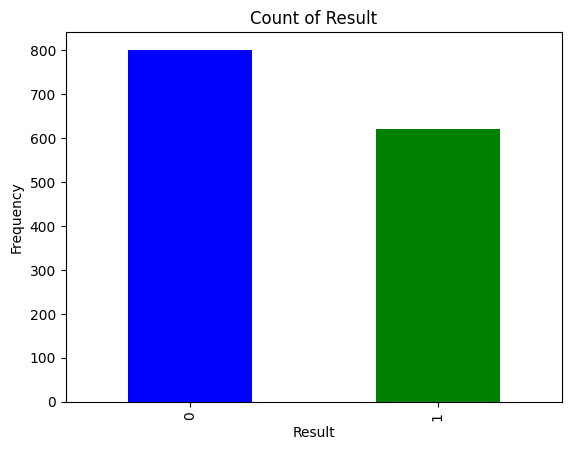

In [ ]:
results=df['Result'].value_counts()
results.plot(kind='bar', color=['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')
plt.show()

In [ ]:
# Balancing it using Undersampling
from sklearn.utils import resample

In [ ]:
majorclass=df[df['Result']==0]
minorclass=df[df['Result']==1]
major_downsample=resample(majorclass,replace=False,n_samples=len(minorclass),random_state=42)
df=pd.concat([major_downsample,minorclass])
print(df['Result'].value_counts())

Result
0    620
1    620
Name: count, dtype: int64


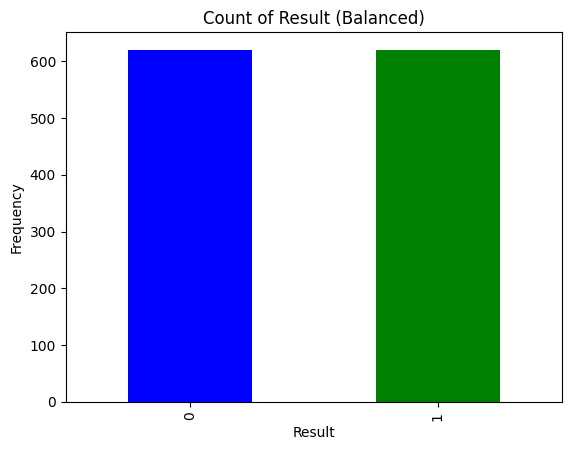

In [ ]:
results_balanced=df['Result'].value_counts()
results_balanced.plot(kind='bar', color=['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result (Balanced)')
plt.show()

In [ ]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000,1240.000000
mean,0.540323,13.218145,22.903952,30.277984,85.620968,0.500000
std,0.498573,1.976190,3.993624,1.394515,9.673794,0.500202
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.500000,19.400000,29.100000,77.300000,0.000000
50%,1.000000,13.000000,22.700000,30.400000,85.300000,0.500000
75%,1.000000,14.900000,26.200000,31.500000,94.225000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


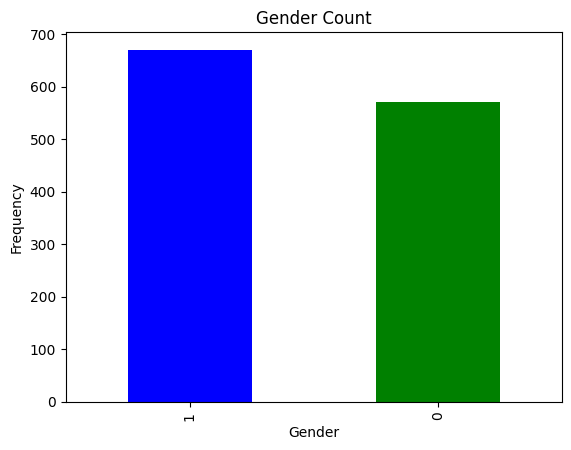

In [ ]:
output=df['Gender'].value_counts()
output.plot(kind='bar', color=['blue','green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Count')
plt.show()

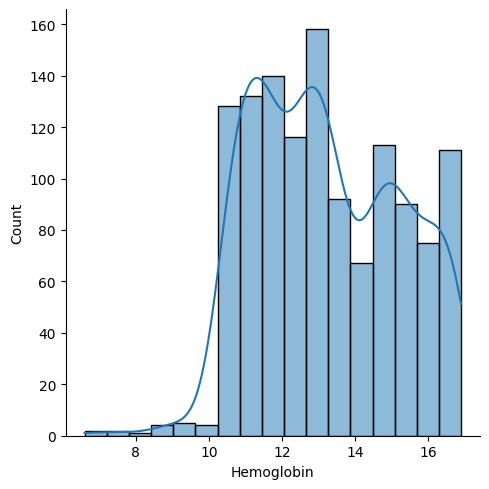

In [ ]:
sns.displot(df['Hemoglobin'], kde=True)

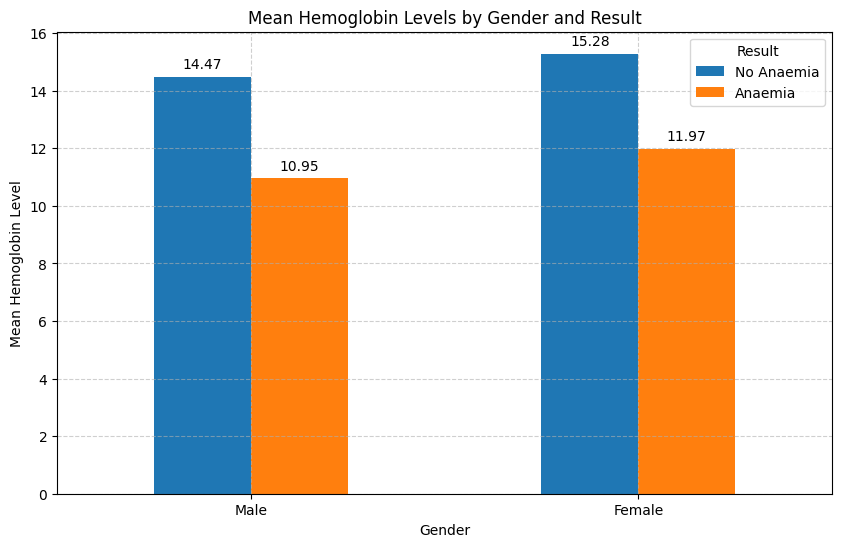

In [ ]:
# Group by Gender and Result, then calculate the mean of Hemoglobin
mean_hemoglobin = df.groupby(['Gender', 'Result'])['Hemoglobin'].mean().unstack()

# Plotting the data
ax = mean_hemoglobin.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Customizing the plot
plt.title('Mean Hemoglobin Levels by Gender and Result')
plt.xlabel('Gender')
plt.ylabel('Mean Hemoglobin Level')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.legend(title='Result', loc='upper right', labels=['No Anaemia', 'Anaemia'])
plt.grid(True, linestyle='--', alpha=0.6)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

# Show the plot
plt.show()

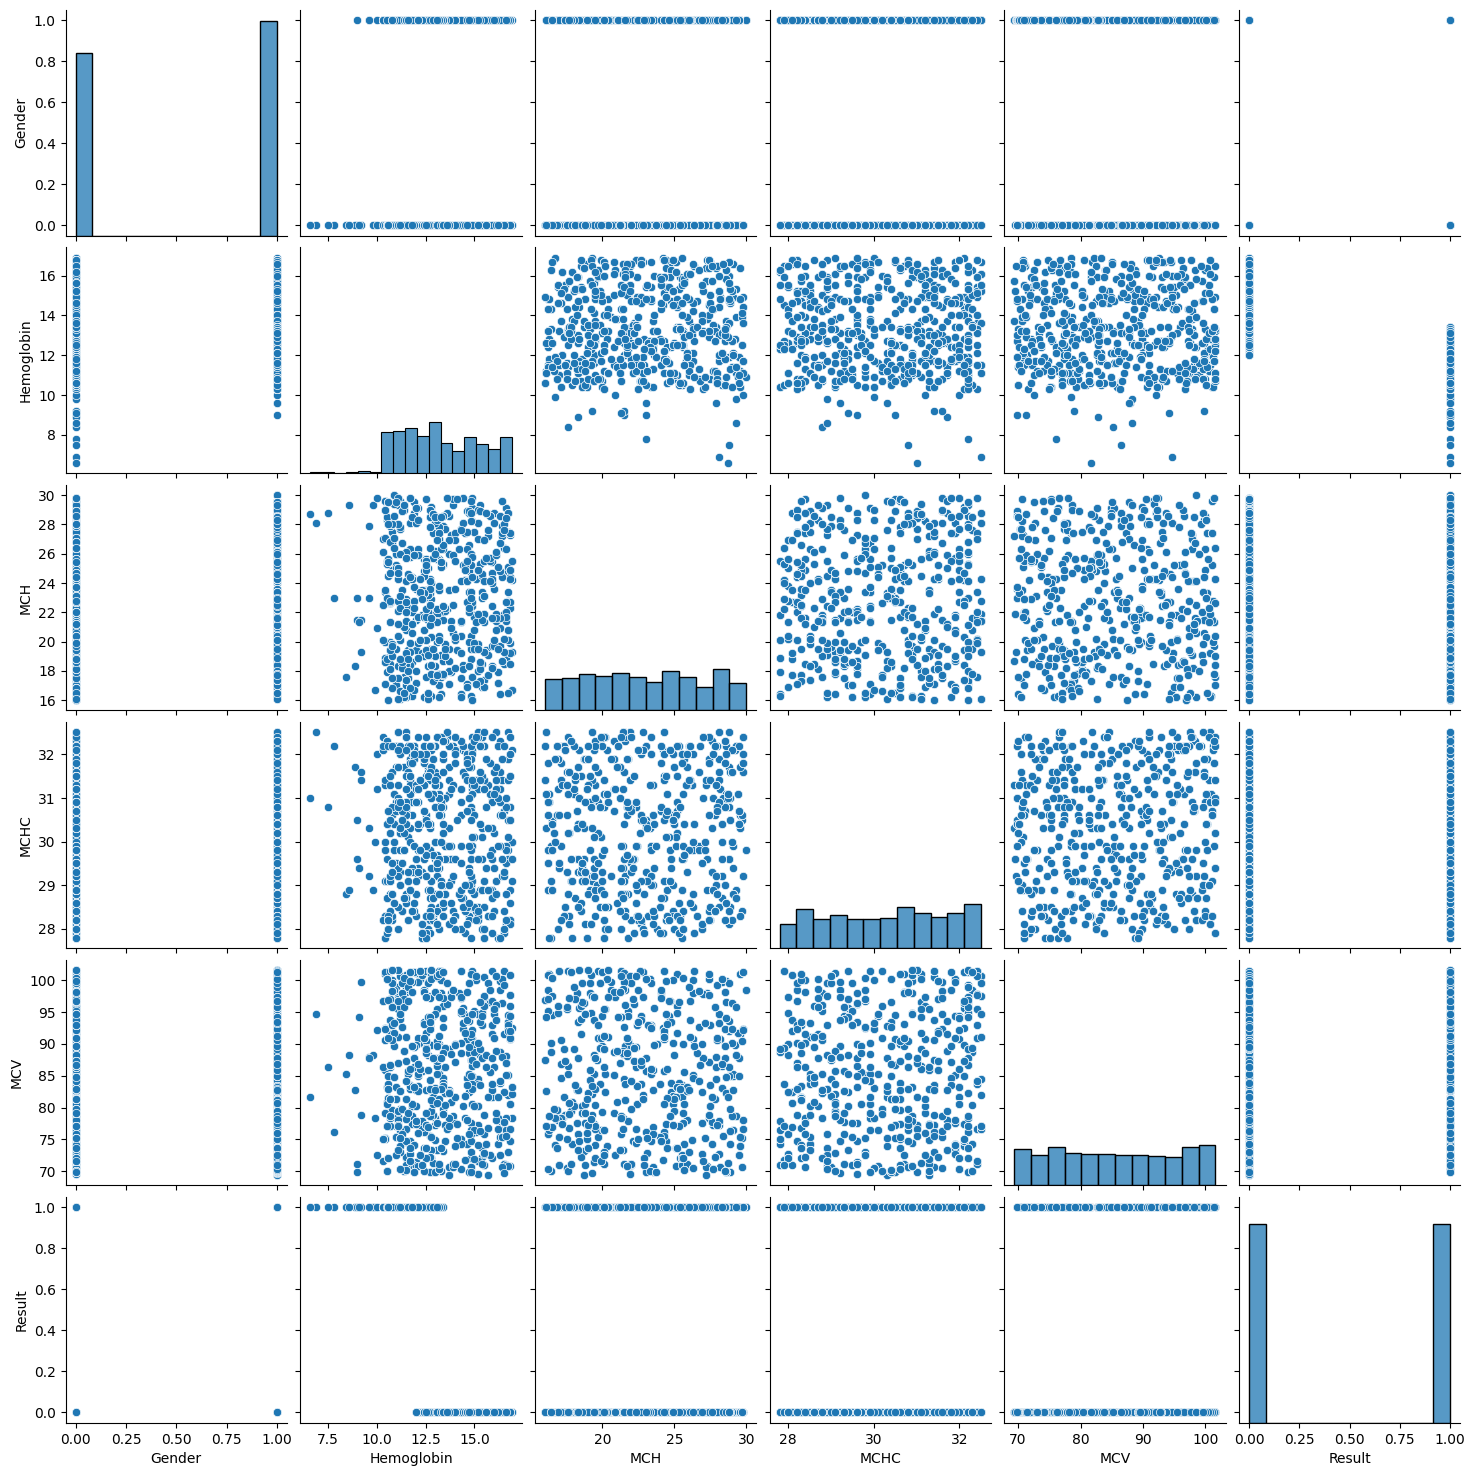

In [ ]:
sns.pairplot(df)

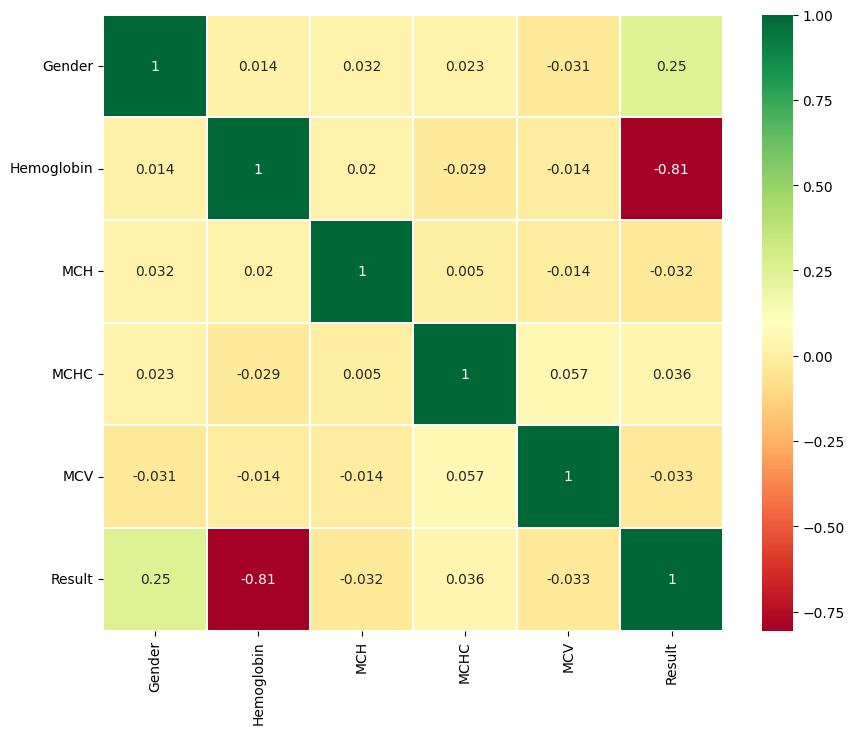

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Splitting Data into Train and Test

In [ ]:
X=df.drop('Result', axis=1)
X

,Gender,Hemoglobin,MCH,MCHC,MCV
1234,1,16.6,18.8,28.1,70.9
1188,0,15.3,18.3,30.4,93.4
106,0,14.8,20.4,28.5,91.1
954,0,14.6,16.9,31.9,78.1
112,0,15.9,28.7,31.0,81.6
...,...,...,...,...,...
1415,1,13.2,20.1,28.8,91.2
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7


In [ ]:
Y=df['Result']
Y

,Result
1234,0
1188,0
106,0
954,0
112,0
...,...
1415,1
1416,1
1417,1
1418,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=20)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 5)
(248, 5)
(992,)
(248,)


In [ ]:
## Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logistic_regression=LogisticRegression()
logistic_regression.fit(x_train, y_train)
y_pred=logistic_regression.predict(x_test)

acc_lr=accuracy_score(y_test, y_pred)
c_lr=classification_report(y_test, y_pred)

print('Accuracy score: ', acc_lr)
print(c_lr)

Accuracy score:  0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       113
           1       0.99      1.00      0.99       135

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248



In [ ]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred=random_forest.predict(x_test)

acc_rf=accuracy_score(y_test, y_pred)
c_rf=classification_report(y_test, y_pred)

print('Accuracy score: ', acc_rf)
print(c_rf)

Accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [ ]:
## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree_model=DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred=decision_tree_model.predict(x_test)

acc_dt=accuracy_score(y_test, y_pred)
c_dt=classification_report(y_test, y_pred)

print('Accuracy score: ', acc_dt)
print(c_dt)

Accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



In [ ]:
## Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

NB=GaussianNB()
NB.fit(x_train, y_train)
y_pred=NB.predict(x_test)

acc_nb=accuracy_score(y_test, y_pred)
c_nb=classification_report(y_test, y_pred)

print('Accuracy score: ', acc_nb)
print(c_nb)

Accuracy score:  0.9798387096774194
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       113
           1       0.97      0.99      0.98       135

    accuracy                           0.98       248
   macro avg       0.98      0.98      0.98       248
weighted avg       0.98      0.98      0.98       248



In [ ]:
## Support Vector Machine
from sklearn.svm import SVC

support_vector=SVC()
support_vector.fit(x_train, y_train)
y_pred=support_vector.predict(x_test)

acc_svc=accuracy_score(y_test, y_pred)
c_svc=classification_report(y_test, y_pred)

print('Accuracy score: ', acc_svc)
print(c_svc)

Accuracy score:  0.9395161290322581
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       113
           1       0.91      0.99      0.95       135

    accuracy                           0.94       248
   macro avg       0.95      0.93      0.94       248
weighted avg       0.94      0.94      0.94       248



In [ ]:
## Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier()
GBC.fit(x_train, y_train)
y_pred=GBC.predict(x_test)

acc_gbc=accuracy_score(y_test, y_pred)
c_gbc=classification_report(y_test, y_pred)

print('Accuracy score: ', acc_gbc)
print(c_gbc)

Accuracy score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00       135

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248



Performance Testing, Hyperparameter Tuning and Model Selection

In [ ]:
model= pd.DataFrame({ "Model": ["Linear Regression", "Random Forest Classifier", "Decision Tree Classifier",
                                "Gaussian Naive Bayes Classifier", "Support Vector Machine", "Gradient Boosting Classifier"],
                     "Score": [acc_lr, acc_rf, acc_dt, acc_nb, acc_svc, acc_gbc]})

In [ ]:
model

,Model,Score
0,Linear Regression,0.991935
1,Random Forest Classifier,1.000000
2,Decision Tree Classifier,1.000000
3,Gaussian Naive Bayes Classifier,0.979839
4,Support Vector Machine,0.939516
5,Gradient Boosting Classifier,1.000000


Model Deployment

In [ ]:
import pickle
import warnings
pickle.dump(logistic_regression,open("model.pkl","wb"))

In [ ]:
prediction=logistic_regression.predict([[0,11.6,22.3,30.9,74.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
prediction[0]

1

In [ ]:
if prediction[0]==0:
    print("You don't have Anemia disease.")
elif prediction[0]==1:
    print("You have Anemia Disease.")

You have Anemia Disease.
